In [53]:

import pandas as pd
from clean_tabular_data import DataTabular

data_products = DataTabular('\\Products.csv')
data_products.clean_price_column()
print(data_products.df.info())
print(data_products.df.head())

ModuleNotFoundError: No module named 'chardet'

In [4]:


data_products.df[['cat:0','cat:1','cat:2']] = data_products.df["category"].apply(lambda x: pd.Series(str(x).split(' / ',2)))


In [5]:
cat0_keys = data_products.df['cat:0'].unique()
cat0_encoder = {}
cat0_decoder = {}
for _ in range(len(cat0_keys)):
    cat0_encoder[cat0_keys[_]] = _
    cat0_decoder[_] = cat0_keys[_]

In [26]:
data_images =  DataTabular('Images.csv')
data_images.df.head()
df_with_category = pd.merge(data_images.df,data_products.df,left_on = 'product_id',right_on ='id',how='inner')
df_with_category.info()
df_with_category.rename(columns={'id_x':'label'})
df_with_category.to_csv('training_data.csv')





ASCII
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11122 entries, 0 to 11121
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0                        11122 non-null  object 
 1   id_x                 11122 non-null  object 
 2   product_id           11122 non-null  object 
 3   index                11122 non-null  int64  
 4   id_y                 11122 non-null  object 
 5   product_name         11122 non-null  object 
 6   category             11122 non-null  object 
 7   product_description  11122 non-null  object 
 8   price                11122 non-null  float64
 9   location             11122 non-null  object 
 10  cat:0                11122 non-null  object 
 11  cat:1                11122 non-null  object 
 12  cat:2                6768 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [62]:
import pandas as pd
df = pd.read_csv('training_data_sandbox\\training_data_clean.csv') 
df = df.sample(frac=1).reset_index(drop=True)

df_train = df.iloc[:5500].reset_index()
df_train.to_csv('training_data_rm_dup.csv')
df_test = df.iloc[5501:].reset_index()
df_test.to_csv('test_data_rm_dup.csv')

#df_train = df(df.iloc[10000])
#df_test = df.index[10001:]
#print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   level_0              727 non-null    int64  
 1   Unnamed: 0.1         727 non-null    int64  
 2   Unnamed: 0           727 non-null    int64  
 3   Unnamed: 1           727 non-null    int64  
 4   id_x                 727 non-null    object 
 5   product_id           727 non-null    object 
 6   index                727 non-null    int64  
 7   id_y                 727 non-null    object 
 8   product_name         727 non-null    object 
 9   category             727 non-null    object 
 10  product_description  727 non-null    object 
 11  price                727 non-null    float64
 12  location             727 non-null    object 
 13  cat:0                727 non-null    object 
 14  cat:1                727 non-null    object 
 15  cat:2                462 non-null    obj

In [21]:
df_train.to_csv('training_with_reserved_test.csv')
df_test.to_csv('test.csv')

In [11]:
from torchvision import models
model    = models.resnet50(  weights='IMAGENET1K_V2')
c = 0
for _ in model.children(): 
    print(_)


Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
ReLU(inplace=True)
MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
Sequential(
  (0): Bottleneck(
    (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (downsample): Sequential(
      (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, t

In [10]:
enumerate(model.children())

In [1]:
import boto3 
s3_client = boto3.client('s3')

ModuleNotFoundError: No module named 'boto3'

In [7]:
import json
import pickle
from pytorch_handle import CustomImageDataset

full_data = CustomImageDataset('training_data.csv')
pkl_data = pickle.dumps(full_data.encoder)
with open('model_final\\encoder.pkl', 'wb') as f:
    f.write(pkl_data)
pkl_data = pickle.dumps(full_data.decoder)
with open('model_final\\decoder.pkl', 'wb') as f:
    f.write(pkl_data)

In [5]:
import pickle

with open('model_final\\decoder.pkl', 'rb') as f:
    decoder =  pickle.load(f)
with open('model_final\\encoder.pkl', 'rb') as f:
    incoder =  pickle.load(f)

['Phones, Mobile Phones & Telecoms']

In [218]:
import requests
from IPython.display import Image as Im
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
from PIL import Image


def plot_image_with_category(file_name,category_str):
    fig = plt.figure(figsize=(5., 5.))
    grid = ImageGrid(fig, 111, 
                    nrows_ncols=(1, 1),  # creates 2x2 grid of axes
                    axes_pad=0.1,  # pad between axes
                    )
    img_arr = []
    img_arr.append(Image.open(file_path + file_name + '.jpg'))

    for ax, im in zip(grid, img_arr):
        ax.imshow(im)
        ax.text(3, 8, 'Predicted cat:'+category_str, style='italic',
            bbox={'facecolor': 'red', 'alpha': 0.75, 'pad': 10})
        ax.text(3, 40, 'Real cat:'+get_real_category(file_name)[0], style='italic',
            bbox={'facecolor': 'green', 'alpha': 0.75, 'pad': 10})

def get_real_category(file_name):
    df = pd.read_csv('training_data_sandbox\\training_data.csv')
    return df[df['id_x'] == file_name]['cat:0'].values.tolist()

def plot_images_with_category(resp_dic,cat_list):
    fig = plt.figure(figsize=(10., 10.))
    grid = ImageGrid(fig, 111, 
                    nrows_ncols=(2, 2),  # creates 2x2 grid of axes
                    axes_pad=0.1,  # pad between axes
                    )
    img_arr = []
    for im in resp_dic['image_labels']:
        img_arr.append(Image.open(file_path + im + '.jpg'))
    i =0 
    for ax, im in zip(grid, img_arr):
        ax.imshow(im)
        ax.text(3, 8, 'cat:'+cat_list[i], style='italic',
            bbox={'facecolor': 'red', 'alpha': 0.75, 'pad': 10})
        ax.text(3, 40, 'Real cat:'+get_real_category(resp_dic['image_labels'][i])[0], style='italic',
            bbox={'facecolor': 'green', 'alpha': 0.75, 'pad': 10})
        i +=1
    plt.show()
    
#host = 'http://host.docker.internal:8080'
#host = 'http://127.0.0.1:8080'
host = 'http://63.33.191.55:8080' # ec2 instance adress
host = 'http://127.0.0.1:8000'   # local instance adress 
file_path = 'images_fb\\clean_images_224\\' # the image from test dataset

file_name = 'ebdb09e9-de15-4b63-aff0-bae01c9cd068'

url =  host+'/healthcheck'
resp = requests.get(url) 
print(resp.json())

url = host+'/predict/feature_embedding'
file = {'file': open(file_path+file_name+'.jpg', 'rb')} # the image embedding
embedings_req = requests.post(url=url,files=file)
print(embedings_req.json())



{'message': 'API is up and running!'}
{'features': [-0.9465306997299194, -5.523683071136475, -0.646118700504303, -1.1066884994506836, -2.222179651260376, -1.8581290245056152, -1.4818227291107178, 3.4808928966522217, 3.5819928646087646, 8.619622230529785, 2.332695484161377, -3.881279706954956, -1.2332159280776978]}


{'category_index': 9, 'category': 'Phones, Mobile Phones & Telecoms'}


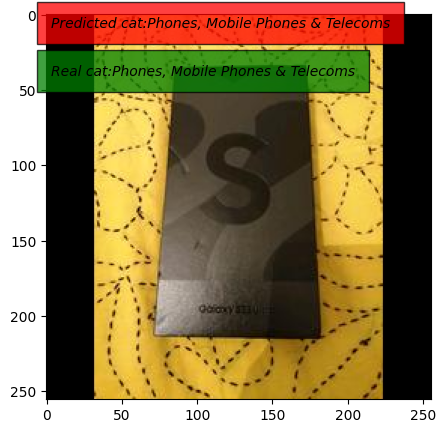

In [219]:
url = host+'/predict/category'
file = {'file': open(file_path+file_name+'.jpg', 'rb')} # the image embedding
category_req = requests.post(url=url,files=file)
plot_image_with_category(file_name,category_req.json()['category'])
print(category_req.json())


{'similar_index': [4765, 4576, 6992, 8920], 'image_labels': ['26bf3333-ff21-4f82-815d-f935c8861b77', '50c5f3f4-3714-40be-8779-e8e99c460aae', '54b34725-551b-4dd1-8723-4950c34cda8b', '9fb4cffe-1ffc-45c4-a066-81a55f0ef3da']}


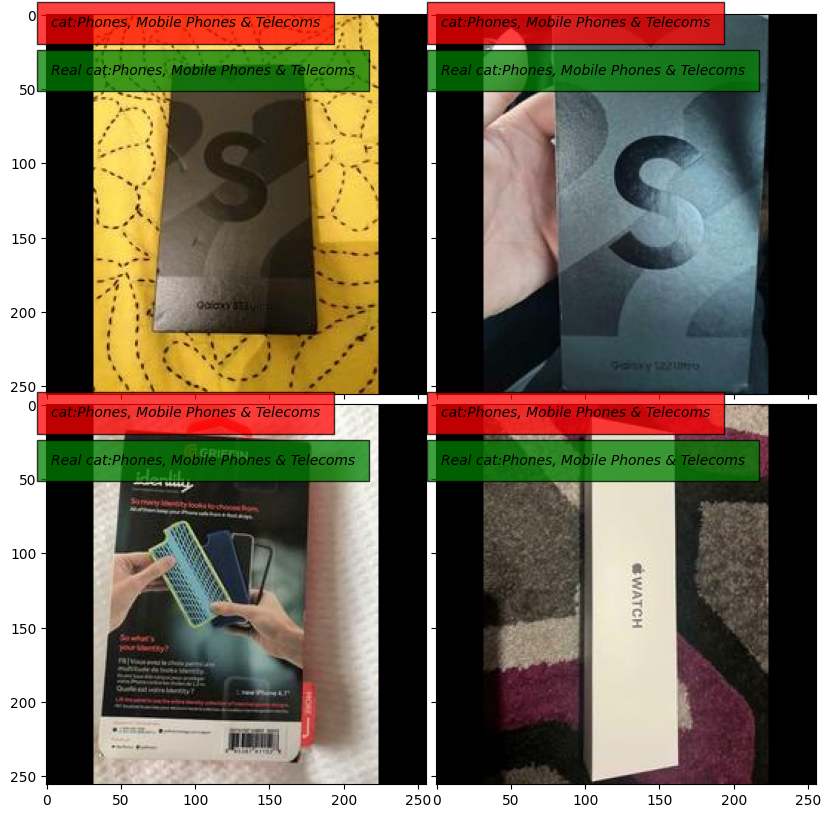

In [220]:
url = host+'/predict/similar_images'
file = {'file': open(file_path+file_name+'.jpg', 'rb')} # the image embedding
resp = requests.post(url=url,files=file)
resp_dic = dict(resp.json())
print(resp_dic)

cat_list = []
url = host+'/predict/category'
for im in resp_dic['image_labels']:
    file = {'file': open(file_path+file_name+'.jpg', 'rb')} # the image embedding
    category_req = requests.post(url=url,files=file)
    cat_list.append(category_req.json()['category'])

plot_images_with_category(resp_dic,cat_list)

In [186]:
print(category_req.json())

{'similar_index': [8465, 8191, 103, 1409], 'image_labels': ['f3fbcc7d-bd45-4878-931f-4e4910c94d7d', '21ecf75a-bdaf-4d49-a2f9-23037b05885c', '09df1611-e7fa-4a9e-b0c3-1aa4dc2501c3', 'db324c40-28ba-490a-961b-3fa319e68670']}


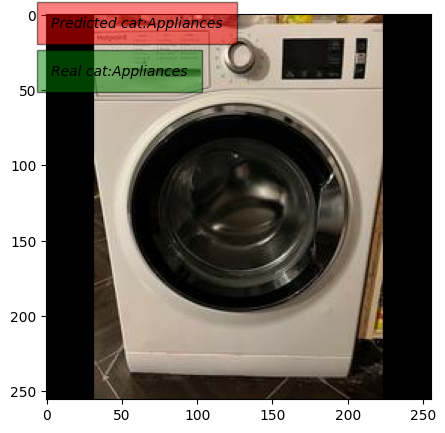

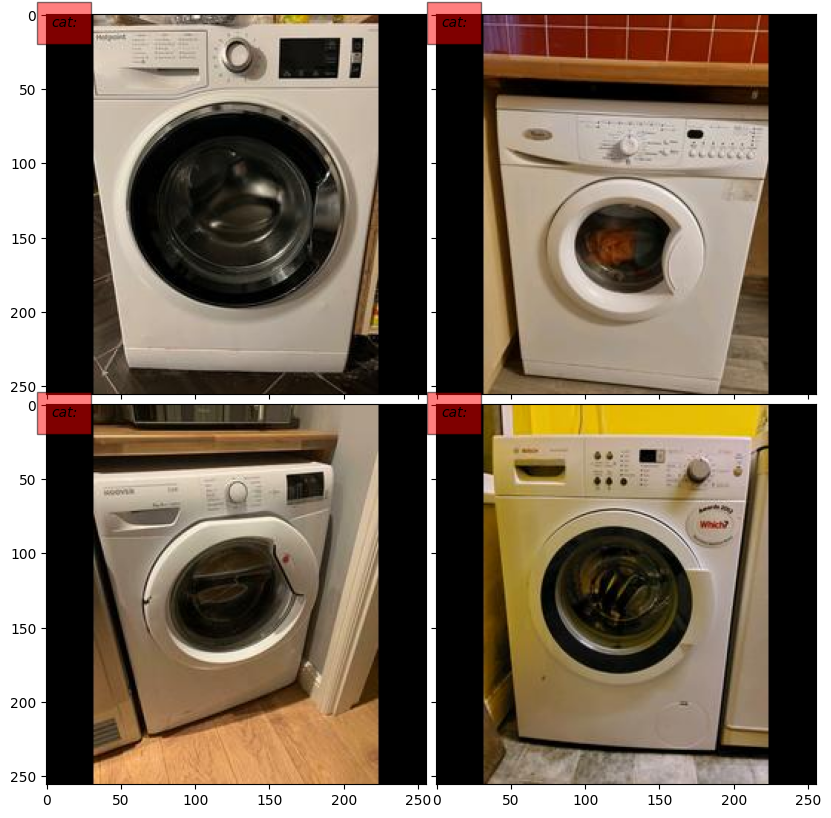

In [165]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
from PIL import Image


def plot_image_with_category(resp_dic,category_str,category_real):
    fig = plt.figure(figsize=(5., 5.))
    grid = ImageGrid(fig, 111, 
                    nrows_ncols=(1, 1),  # creates 2x2 grid of axes
                    axes_pad=0.1,  # pad between axes
                    )
    img_arr = []
    img_arr.append(Image.open(file_path + resp_dic['image_labels'][0] + '.jpg'))

    for ax, im in zip(grid, img_arr):
        ax.imshow(im)
        ax.text(3, 8, 'Predicted cat:'+category_str, style='italic',
            bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
        ax.text(3, 40, 'Real cat:'+category_real, style='italic',
            bbox={'facecolor': 'green', 'alpha': 0.5, 'pad': 10})

def plot_images_with_category(resp_dic):
    fig = plt.figure(figsize=(10., 10.))
    grid = ImageGrid(fig, 111, 
                    nrows_ncols=(2, 2),  # creates 2x2 grid of axes
                    axes_pad=0.1,  # pad between axes
                    )
    img_arr = []
    for im in resp_dic['image_labels']:
        img_arr.append(Image.open(file_path + im + '.jpg'))

    for ax, im in zip(grid, img_arr):
        ax.imshow(im)
        ax.text(3, 8, 'cat:', style='italic',
            bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
    plt.show()
    
plot_image_with_category(resp_dic,category_req.json()['category'],'Appliances')
plot_images_with_category(resp_dic)


In [162]:
category_req.json()['category']

'Appliances'

In [84]:
for im in resp_dic['image_labels']:
    Image.open(file_path+ im +'.jpg')
